# Part II - (Prosper Loan Dataset)
## by (Rita Chukwuma)



## Investigation Overview


> During this investigation, I focus mainly on finding out the variables that influences borrowers APR and investors Estimated return. I started by introducing the estimated return by plotting its distribution and I tried calculating the actual return by using Prosper's Net Annualized formula but couldn’t get accurate result due to some other factors that are far-fetched. 
However, I used various plots, to explore extensively on the relationship among all my variables of interest, particularly: BorowersAPR, stated monthly income, loan amount, EstimatedReturn, ProsperScore.

## Dataset Overview

> The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate, borrower income, current loan status etc, from the year 2009-2014.

> The dataset is subdivided into two main categories:

> The borrower information: Basic attributes of the borrowers such as stated monthly income, income range, employment status, interest rate, loan status, Bank card Utilization etc. The Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper Rating and Estimated Returns, Prosper Score etc.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
ploan = pd.read_csv('prosper_loan_data.csv')
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [14]:
# Subseting the dataframe by selecting features of interest
cols = ['EstimatedReturn', 'LoanOriginalAmount', 'ProsperScore', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
ploan_int = ploan[cols]

ploan_int.shape

(113937, 8)

In [15]:
def plot_hist(dataframe,column_name,bin_stip):
    bins=np.arange(dataframe[column_name].min(),dataframe[column_name].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataframe,x=column_name,bins=bins);
    return(plot)

In [19]:
# drop null rows without an estimated return
ploan_int.EstimatedReturn.dropna(axis = 0, inplace = True)
ploan_int.BorrowerAPR.dropna(axis = 0, inplace = True)

In [17]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
ploan_int['ProsperRating'] = ploan_int['ProsperRating (Alpha)'].astype(ordered_var)

# Print the proportion below the bars 
n_loans=ploan['LoanStatus'].value_counts().sum()
status_count=ploan['LoanStatus'].value_counts()
status_order=status_count.index

## (Visualization 1)

>  The plot shows the distribution is right skewed. It also looks like there are some peaks at 5%, 7.5%, 8.0%, 0.1% and 12.5%. However, the largest bin falls right around 12.5%.

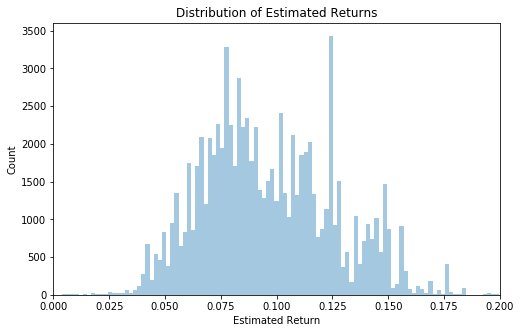

In [20]:
# plot the distribution of estimated returns in histogram
plt.figure(figsize = [8,5])
sb.distplot(ploan_int.EstimatedReturn, kde = False, bins = 250)
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Returns');

## (Visualization 2)

>  This plot show that 4.0 seems to be the one with highest score of 112595

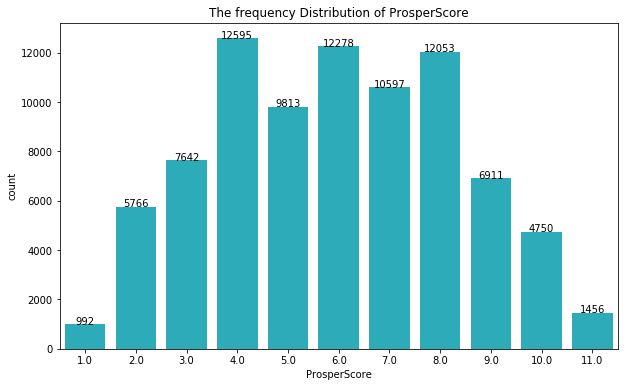

In [22]:
#Plot ordinal variable distribution 'Prosper Scores'
colorChoice = sb.color_palette()[9]

plt.figure(figsize=[10, 6]);
sb.countplot(data = ploan_int, x = 'ProsperScore', color = colorChoice);
plt.title('The frequency Distribution of ProsperScore');

locs, labels = plt.xticks()
cat_counts = ploan_int['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

## (Visualization 3)

Here we have a normal distribution with a peak at around 0.2 and an exceptional high counts between 0.35% and 0.358%. The plot looks not too skewed.

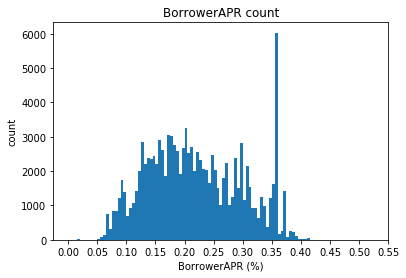

In [23]:

bins = np.arange(0, ploan_int['BorrowerAPR'].max(), 0.005)
plt.hist(data = ploan_int, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, ploan_int['BorrowerAPR'].max()+0.05, 0.05));

## (Visualization 4)

> The plot below shows us how an increase in BorrowerAPR causes an Increase in Estimated Return while high prosper score brings a decrease on Estimated Return.

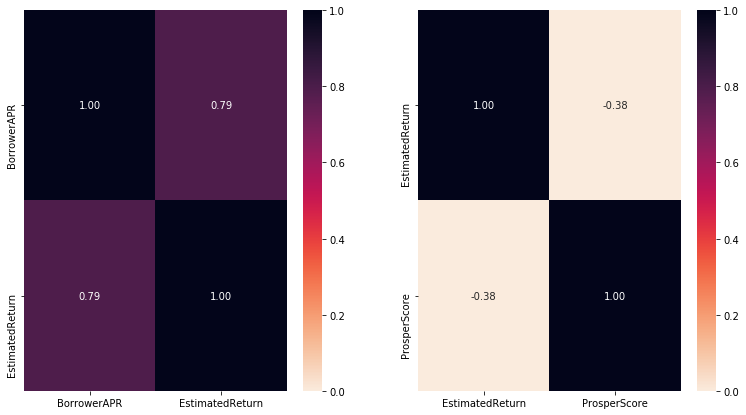

In [24]:
# Heatmap plot to find out how Borrower APR and Prosper Score influences EstimatedReturns.
plt.figure(figsize = [20, 7])

plt.subplot(1,3,1)
stats = ['BorrowerAPR','EstimatedReturn']
sb.heatmap(ploan_int[stats].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)

plt.subplot(1,3,2)
sb.heatmap(ploan_int[['EstimatedReturn', 'ProsperScore']].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)


## (Visualization 5)

In this plot both Stated Monthly Income and Loan Original Amount are negatively correlated to BorrowerAPR. An increase in income brings about an increase in loan amount and eventually a decrease in BorrowerAPR.

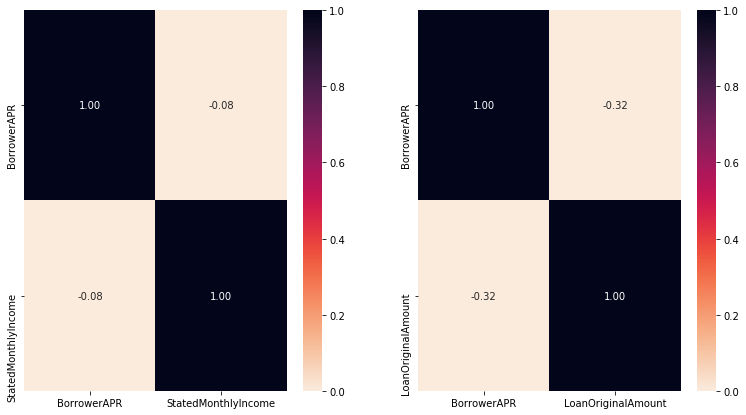

In [25]:
# Heatmap that displays how Stated Monthly Income  and LoanOriginalAmount influences BorrowerAPR.
plt.figure(figsize = [20, 7])

plt.subplot(1,3,1)
stats = ['BorrowerAPR','StatedMonthlyIncome']
sb.heatmap(ploan_int[stats].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)

plt.subplot(1,3,2)
sb.heatmap(ploan_int[['BorrowerAPR', 'LoanOriginalAmount']].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
